<a href="https://colab.research.google.com/github/eslyyyyy/Assignment1-Gaussian-Mixture-Model/blob/main/Kompstat_Tugas_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1. Esly Vani Frasanti Saragih - 2106700782
2. Lutfia Maulidina - 2006483151
3. Marcella Sintauly - 2006568916
4. Muhammad Hanif Pramudya Zamzami - 2006487566

#Import dataset

In [ ]:
import pandas as pd
df = pd.read_csv(r'/content/Iris.csv')
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


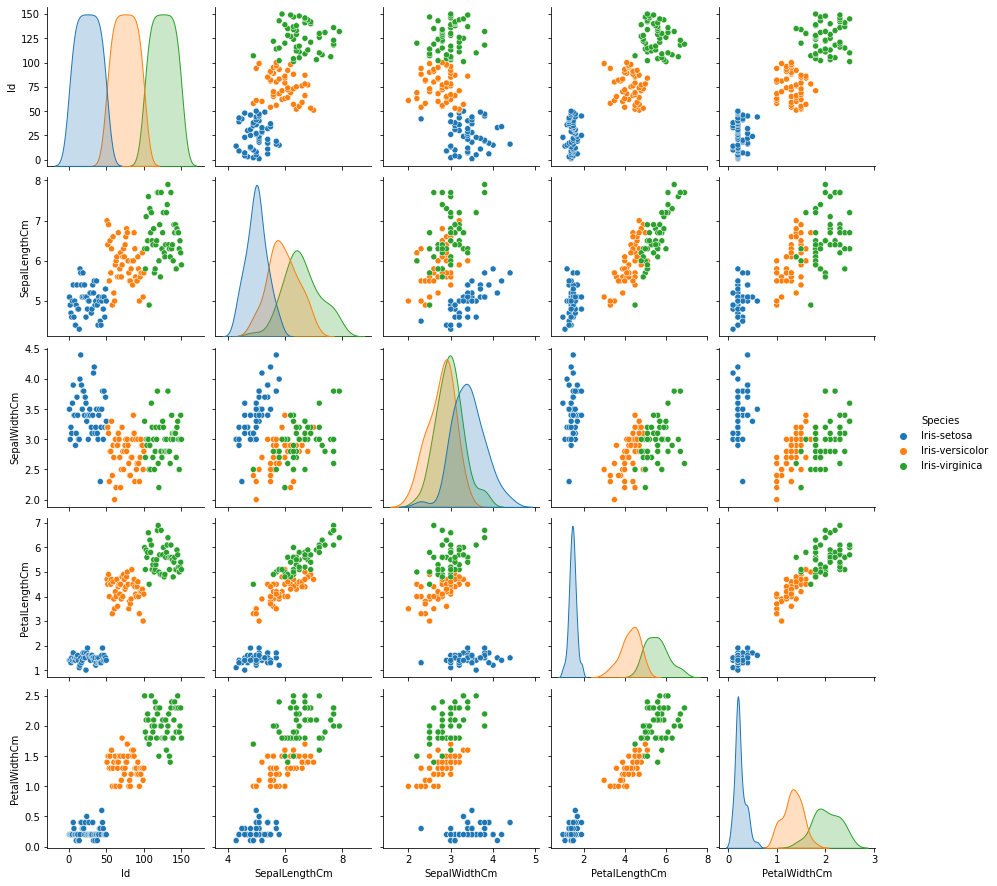

In [ ]:
#plot asli data iris
import seaborn as sns
sns.pairplot(df, hue='Species')

#K-means clustering 

Petal Length vs Petal witdh

In [ ]:
df2=df[['PetalLengthCm','PetalWidthCm']]
df2

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


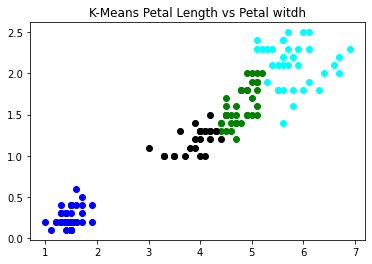

In [ ]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(df2)

#prediction from kmeans
pred = kmeans.predict(df2)
frame = pd.DataFrame(df2)
frame['cluster'] = pred
frame.columns = ['PetalLengthCm','PetalWidthCm','cluster']

#plotting results
color = ['blue','green','cyan','black']
for k in range(0,4):
  df2 = frame[frame["cluster"]==k]
  plt.scatter(df2["PetalLengthCm"], df2["PetalWidthCm"],c = color[k])
plt.title('K-Means Petal Length vs Petal witdh')
plt.show()

Sepal Length vs Sepal witdh

In [ ]:
df3=df[['SepalLengthCm','SepalWidthCm']]
df3

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [ ]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(df3)

#prediction from kmeans
pred = kmeans.predict(df3)
frame = pd.DataFrame(df3)
frame['cluster'] = pred
frame.columns = ['SepalLengthCm','SepalWidthCm','cluster']

#plotting results
color =  ['blue','green','cyan','black']
for k in range(0,4):
  df2 = frame[frame["cluster"]==k]
  plt.scatter(df2["SepalLengthCm"], df2["SepalWidthCm"],c = color[k])
plt.title('K-Means Sepal Length vs Sepal witdh')
plt.show()

#GMM clustering

Petal Length vs Petal Width 

In [ ]:
df2=df[['PetalLengthCm','PetalWidthCm']]
df2

from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
gmm.fit(df2)

#prediction from gmm
labels = gmm.predict(df2)
frame = pd.DataFrame(df2)
frame['cluster']=labels
frame.columns = ['PetalLengthCm','PetalWidthCm','cluster']

color = ['blue','green','cyan','black']
for k in range (0,4) :
  df2 = frame[frame['cluster']==k]
  plt.scatter(df2['PetalLengthCm'],df2['PetalWidthCm'], c = color[k])
plt.title('GMM Petal Length vs Petal witdh')
plt.show()

Sepal Length vs Sepal Width 

In [ ]:
df3=df[['SepalLengthCm','SepalWidthCm']]
df3

from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
gmm.fit(df3)

#prediction from gmm
labels = gmm.predict(df3)
frame = pd.DataFrame(df3)
frame['cluster']=labels
frame.columns = ['SepalLengthCm','SepalWidthCm','cluster']

color = ['blue','green','cyan','black']
for k in range (0,4) :
  df3 = frame[frame['cluster']==k]
  plt.scatter(df3['SepalLengthCm'],df3['SepalWidthCm'], c = color[k])
plt.title('GMM Sepal Length vs Sepal witdh')
plt.show()

#GMM dengan EM

Petal Length vs Petal Width

In [ ]:
#PETAL
from sklearn import cluster,datasets
iris = datasets.load_iris()

estimators = dict((cov_type, GaussianMixture(n_components=4,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])
for (name,estimator) in estimators.items():
    estimator.fit(iris.data[:,2:4]) ## fits mixture model menggunakan EM

colors = ['navy', 'turquoise', 'darkorange']
markers = ['+','*','x']

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,


In [ ]:
from matplotlib.patches import Ellipse
def plot_cov_ellipse(cov, pos, col='b', nstd=2, ax=None, **kwargs):
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]
    if ax is None:
        ax = plt.gca()
    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, color=col, alpha=0.2,**kwargs)
    ax.add_artist(ellip)
    return ellip

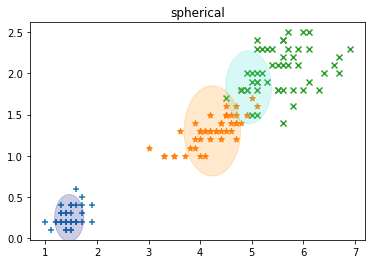

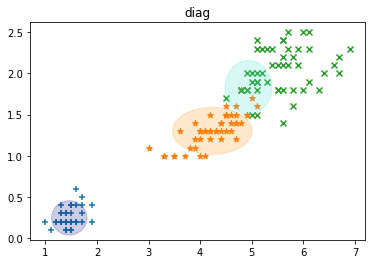

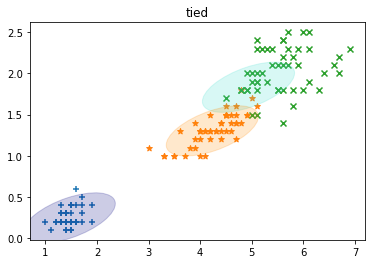

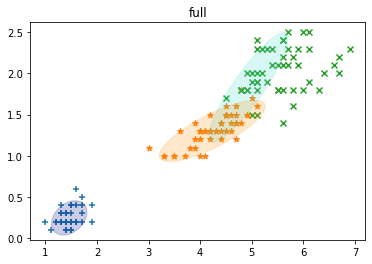

In [ ]:
import numpy as np

for (name,gmm) in estimators.items():
    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 2], data[:, 3], marker=markers[n])
        if gmm.covariance_type == 'full':
            cov = gmm.covariances_[n]
        elif gmm.covariance_type == 'tied':
            cov = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            cov = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == 'spherical':
            cov = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        #print(cov)
        pos = estimator.means_[n]
        #print(pos)
        plot_cov_ellipse(cov,pos,col=color)
    plt.title(name)
    plt.show()

Sepal Length vs Sepal Width

In [ ]:

from sklearn import cluster,datasets
iris = datasets.load_iris()

estimators = dict((cov_type, GaussianMixture(n_components=4,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])
for (name,estimator) in estimators.items():
    estimator.fit(iris.data[:,0:2]) ## fits mixture model menggunakan EM

colors = ['navy', 'turquoise', 'darkorange', 'Black']
markers = ['+','*','x', 'o']

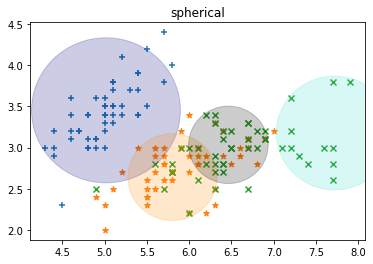

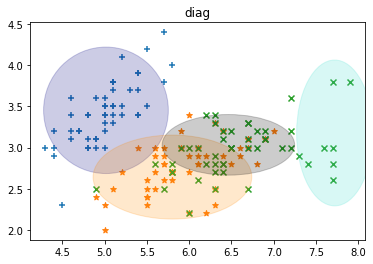

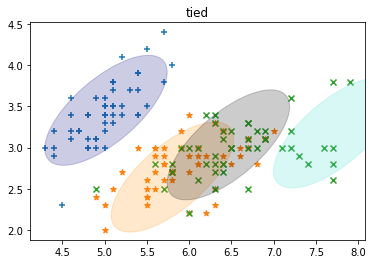

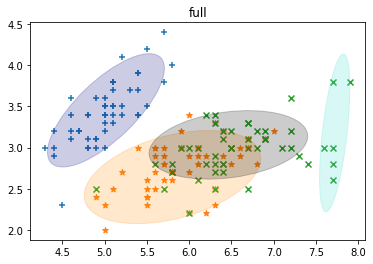

In [ ]:
import numpy as np

for (name,gmm) in estimators.items():
    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], marker=markers[n])
        if gmm.covariance_type == 'full':
            cov = gmm.covariances_[n]
        elif gmm.covariance_type == 'tied':
            cov = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            cov = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == 'spherical':
            cov = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        #print(cov)
        pos = estimator.means_[n]
        #print(pos)
        plot_cov_ellipse(cov,pos,col=color)
    plt.title(name)
    plt.show()

## Untuk Menjawab Soal B, akan dilakukan analisis perbandingan dari metode K-Means dan GMM berdasarkan Petal length da 

#Interpretasi

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- PetalLengthCm
- PetalWidthCm
Feature names seen at fit time, yet now missing:
- SepalLengthCm
- SepalWidthCm

  warnings.warn(message, FutureWarning)


<Figure size 720x1008 with 0 Axes>

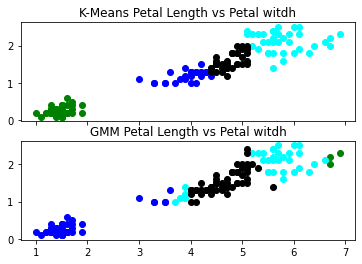

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 14))

fig, ax = plt.subplots(2, 
           sharex='col', sharey='row')

df2=df[['PetalLengthCm','PetalWidthCm']]

pred = kmeans.predict(df2)
frame = pd.DataFrame(df2)
frame['cluster'] = pred
frame.columns = ['PetalLengthCm','PetalWidthCm','cluster']

color = ['blue','green','cyan','black']
for k in range(0,4):
  df2 = frame[frame["cluster"]==k]
  ax[0].scatter(df2["PetalLengthCm"], df2["PetalWidthCm"],c = color[k])

df2=df[['PetalLengthCm','PetalWidthCm']]

labels = gmm.predict(df2)
frame = pd.DataFrame(df2)
frame['cluster']=labels
frame.columns = ['PetalLengthCm','PetalWidthCm','cluster']

for k in range (0,4) :
  df2 = frame[frame['cluster']==k]
  ax[1].scatter(df2['PetalLengthCm'],df2['PetalWidthCm'], c = color[k])

ax[0].title.set_text('K-Means Petal Length vs Petal witdh')
ax[1].title.set_text('GMM Petal Length vs Petal witdh')
plt.show()



K-means clustering adalah hasil clustering dengan rata-rata sebagai acuan. GMM clustering menggunakan distribusi gaussian (mean dan variansi)sebagai acuannya.

K-means adalah hard clustering. GMM adalah soft clustering. 

Hasil clustering menggunakan K-means Petal Length vs Petal Width didapatkan berbentuk eliptikal yang berarti tidak baik dibandingkan cluster yang berbentuk circular. Untuk hasil K-means clustering Sepal Length vs Sepal Width terdapat part dimana plotnya berbentuk eliptikal yaitu pada warna hitam hijau. Berarti K-means clustering kurang baik dalam klasifikasi iris

Hasil clustering menggunakan menggunakan GMM terlihat dari plotnya berbentuk circular dan terdapat cluster saling overlap yang berarti cluster yang dibuat cukup baik dalam klasifikasi iris

Kesimpulannya, clustering menggunakan GMM lebih baik daripada K-means. 

Akan dibandingkan plot GMM, K-means, dan GMM EM dengan plot aslinya dan didapatkan bahwa GMM EM adalah yang paling baik dalam klasifikasi iris